In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
#%matplotlib inline

import pandas as pd

## Linear Model/Regression
Save .csv file from https://www.randomservices.org/random/data/Galton.html

Another source: https://raw.githubusercontent.com/data-8/materials-fa17/master/lec/galton.csv

F. Galton introduced the term _regression._ In the figure below you can see that "extremely tall parents tend to have children who are taller than average and extremely small parents tend to have children who are smaller than average, but in both cases the children tend to be closer to the average than were their parents". (Stephen Senn _Francis Galton and regression to the mean._ Significance, Vol. 8, Iss. 3)

![title](https://upload.wikimedia.org/wikipedia/commons/b/b2/Galton%27s_correlation_diagram_1875.jpg)
**Francis Galton.** *Regression towards mediocrity in hereditary stature.* The Journal of the Anthropological Institute of Great Britain and Ireland. 15: 246–263 (1886)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anton-selitskiy/The-Art-of-ML/main/Galtons%20Height%20Data.csv')

In [ ]:
df.head() #df.tail(6)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [ ]:
#df.info()

In [ ]:
#df.describe()

2. Create a new column with the avarage height of the parents

In [ ]:
#Your code
df["Average Hight"] = (df["Father"]+df["Mother"])/2

In [ ]:
X = df[df.Gender=='M']['Average Hight'].values
y = df[df.Gender=='M'].Height.values

In [ ]:
X.shape, y.shape

((465,), (465,))

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression()

In [ ]:
reg.fit(X[:,None],y)

LinearRegression()

In [ ]:
w0, w1 = reg.intercept_, reg.coef_[0]
w0, w1

(19.67151840322768, 0.7442525851182429)

In [ ]:
X_tilde = np.hstack((np.ones(len(X)).reshape(-1,1), X.reshape(-1,1)))
np.linalg.inv(X_tilde.T@X_tilde)@X_tilde.T@y

array([19.6715184 ,  0.74425259])

Text(0, 0.5, "Son's Height")

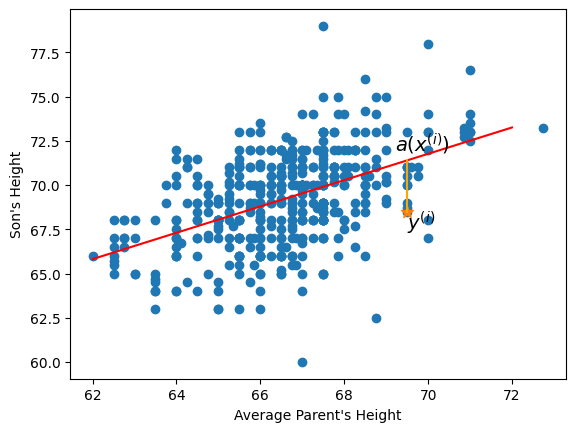

In [ ]:
plt.scatter(X[:], y)
plt.plot([62, 72], [w0+w1*62, w0+w1*72], c='r')
plt.scatter([X[5]],[y[5]], marker='*', s=80)
plt.plot([X[5], X[5]], [y[5], w0+w1*X[5]], c='orange')
plt.text(X[5],y[5]-1,'$y^{(i)}$', size=14)
plt.text(X[5]-0.3,w0+w1*X[5]+0.5,'$a(x^{(i)})$', size=14)
plt.xlabel('Average Parent\'s Height')
plt.ylabel('Son\'s Height')

In [6]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, reg.predict(X[:,None])))

## Different behavior of MSE and MAE with outliers

In [ ]:
X_out = np.hstack((X, np.array([75,100])))
y_out = np.hstack((y, np.array([250,200])))

In [ ]:
reg.fit(X_out[:,None],y_out)

NameError: name 'reg' is not defined

In [ ]:
w02, w12 = reg.intercept_, reg.coef_[0]

Text(0, 0.5, "Son's Height")

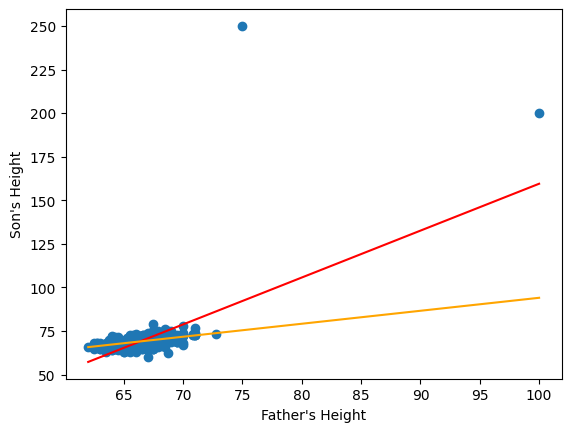

In [ ]:
plt.scatter(X_out[:], y_out)
plt.plot([62, 100], [w02+w12*62, w02+w12*100], c='r')
#plt.scatter([X_out[5]],[y_out[5]], marker='*', s=80)
plt.plot([62, 100], [w0+w1*62, w0+w1*100], c='orange')
# plt.plot([X_out[5], X_out[5]], [y_out[5], w0+w1*X_out[5]], c='orange')
# plt.text(X_out[5],y_out[5]-1,'$y^{(i)}$', size=14)
# plt.text(X_out[5]-0.3,w0+w1*X_out[5]+0.5,'$a(x^{(i)})$', size=14)
plt.xlabel('Father\'s Height')
plt.ylabel('Son\'s Height')

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.quantreg('y~X', pd.DataFrame({'X':X_out, 'y':y_out}))

In [ ]:
res = model.fit()

In [ ]:
w01, w11 = res.params.values

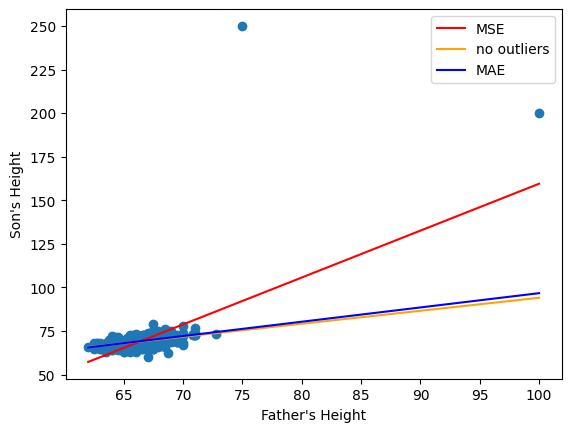

In [ ]:
plt.scatter(X_out[:], y_out)
plt.plot([62, 100], [w02+w12*62, w02+w12*100], c='r', label='MSE')
#plt.scatter([X_out[5]],[y_out[5]], marker='*', s=80)
plt.plot([62, 100], [w0+w1*62, w0+w1*100], c='orange', label='no outliers')
#plt.plot([X_out[5], X_out[5]], [y_out[5], w0+w1*X_out[5]], c='orange')
plt.plot([62, 100], [w01+w11*62, w01+w11*100], c='b', label='MAE')
# plt.text(X_out[5],y_out[5]-1,'$y^{(i)}$', size=14)
# plt.text(X_out[5]-0.3,w0+w1*X_out[5]+0.5,'$a(x^{(i)})$', size=14)
plt.xlabel('Father\'s Height')
plt.ylabel('Son\'s Height')
plt.legend()

## Regression with two features

In [ ]:
X = df[df.Gender=='M'][['Mother', 'Father']].values
y = df[df.Gender=='M'].Height.values

In [ ]:
reg.fit(X,y)
w0, w1, w2 = reg.intercept_, reg.coef_[0], reg.coef_[1]

Text(0.5, 0, "Son's Height")

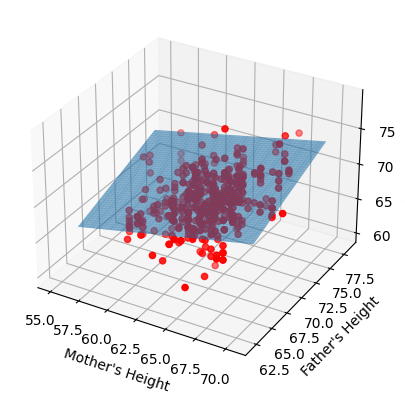

In [ ]:
fig = plt.figure()

a,b,c,d = 55, 70, 65, 77

# Make grid
x1_ = np.linspace(a, b, 100)
x2_ = np.linspace(c, d, 100)
x1, x2 = np.meshgrid(x1_, x2_)
y_ = w0 + w1*x1 + w2*x2

# Plot the surface
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x1, x2, y_, alpha=0.6)
ax.scatter(X[:,0], X[:,1], y, c='r', marker='o')
ax.set_xlabel('Mother\'s Height')
ax.set_ylabel('Father\'s Height')
ax.set_zlabel('Son\'s Height')

In [ ]:
np.sqrt(mean_squared_error(y, reg.predict(X)))

2.292190969136321

## Gradient Descent

In [2]:
def plot_3d_GD(fun, a=-1, b=1, c=-1, d=1, trace=None):
    """
    Visualize fun on [a, b] x [c, d]

    Optional - line on the surface
    trace : np.array N x 2 - coordinates of the path
    """
    fig = plt.figure()

    # Make grid
    x1_ = np.linspace(a, b, 100)
    x2_ = np.linspace(c, d, 100)
    x1, x2 = np.meshgrid(x1_, x2_)
    y_ = fun(x1, x2)

    # Plot the surface
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x1, x2, y_, alpha=0.6)
    ax.contour(x1, x2, y_, zdir='z',
                  offset=y_.min(), cmap=cm.coolwarm)

    # Plot 3d line
    if trace is not None:
        y_trace = fun(trace[:, 0], trace[:, 1])
        ax.plot(trace[:, 0], trace[:, 1], y_trace, "o-")
        ax.plot(trace[:, 0], trace[:, 1], "o-")
        ax.set_xlim(x1.min(), x1.max())
        ax.set_ylim(x2.min(), x2.max())
        ax.set_zlim(y_.min(), y_.max())

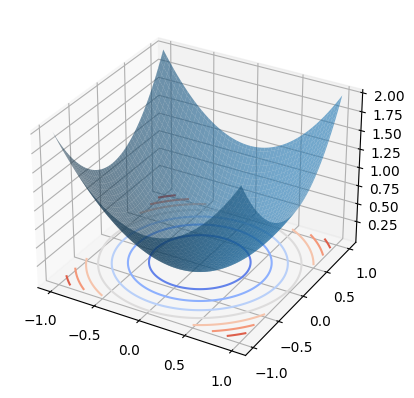

In [ ]:
plot_3d_GD(lambda x1,x2: x1**2+x2**2)

In [ ]:
# y = np.log(y)
# Xm = np.vstack((np.ones(len(X)),(X[13].values - X[13].values.mean())/X[13].values.std())).T
# [w0,w1]=(np.linalg.inv(Xm.T@Xm)@Xm.T).dot(y)
# w0,w1

In [3]:
class b_grad_descend():
    """
    * grad_fun - gradient
    * step_size - learing rate
    * num_steps - number if iterations

    Returns np.array (num_steps+1) x 2,
    the first element is the random initialization
    """
    def __init__(self, Xm, y, b=1):
        self.X = Xm
        self.y = y
        self.b = b
        #self.step_size=step_size
        #self.num_steps=num_steps
    def grad_loss(self,w1, w2):
        w = np.array([w1,w2])
        idx = np.random.randint(0, len(self.y), self.b)
        X = self.X[idx,:].reshape(-1,2)
        y = self.y[idx]
        return 2*X.T.dot(X.dot(w)-y)/len(y)
    def loss(self, w1, w2):
        w = np.array([w1,w2])
        y_ = self.y.copy()
        for i in range(len(w.shape)-1):
            y_ = np.expand_dims(y_, axis=i+1)
        return np.mean(np.power(np.tensordot(self.X,w, axes=(1,0)) - y_, 2), axis=0)
    def gd(self, x0, step_size=0.2, num_steps=20):
        n_features = 2
        d = [x0]
        for i in range(num_steps):
            d.append(d[i]-step_size*self.grad_loss(d[i][0],d[i][1]))
        return np.array(d)

In [4]:
def plot_gradient(w_list, a=-1, b=1, c=-1, d=1, title=''):
    A, B = np.meshgrid(np.linspace(a, b, 100), np.linspace(c, d, 100))

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = bGD.loss(A[i, j], B[i, j])

    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
    plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)

    # visualize trajectory
    plt.scatter(w0, w1, c='r')
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

In [ ]:
X = df[df.Gender=='M']['Average Hight'].values
y = df[df.Gender=='M'].Height.values

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Xm=np.vstack((np.ones(len(X)),scaler.fit_transform(X.reshape(-1,1))[:,0])).T

In [ ]:
Xm=np.vstack((np.ones(len(X)),X)).T
#GD = grad_descend(Xm,y) #_target)

In [ ]:
batch_size = 1 #len(Xm)

In [ ]:
bGD = b_grad_descend(Xm,y,batch_size)

In [ ]:
reg.fit(Xm[:,1].reshape(-1,1),y)
#reg.fit(X.reshape(-1,1),y)

LinearRegression()

In [ ]:
w0, w1 = reg.intercept_, reg.coef_[0]
w0, w1

(69.22881720430108, 1.2812568051776452)

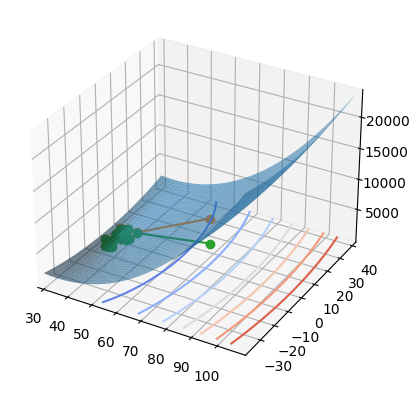

In [ ]:
#x0 = np.array([w0,w1])+ np.random.uniform(-200, 200, 2)
x0 = np.array([w0,w1])+ np.random.uniform(-20, 20, 2)
trace = bGD.gd(x0, 0.1,25) # grad_descend(grad_loss, Xm, y, 0.1, 20)
dist = 40 #200
a, b, c, d = w0-dist, w0+dist, w1-dist, w1+dist
plot_3d_GD(bGD.loss, a, b, c, d, trace=trace)

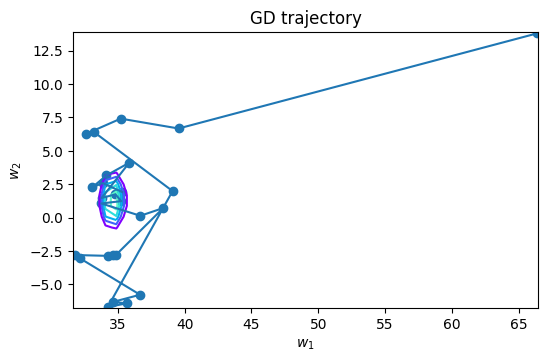

In [ ]:
plot_gradient(trace, a, b, c, d, title='GD trajectory')

In [ ]:
#For animation in Colab
!pip install JSAnimation
from IPython.display import HTML

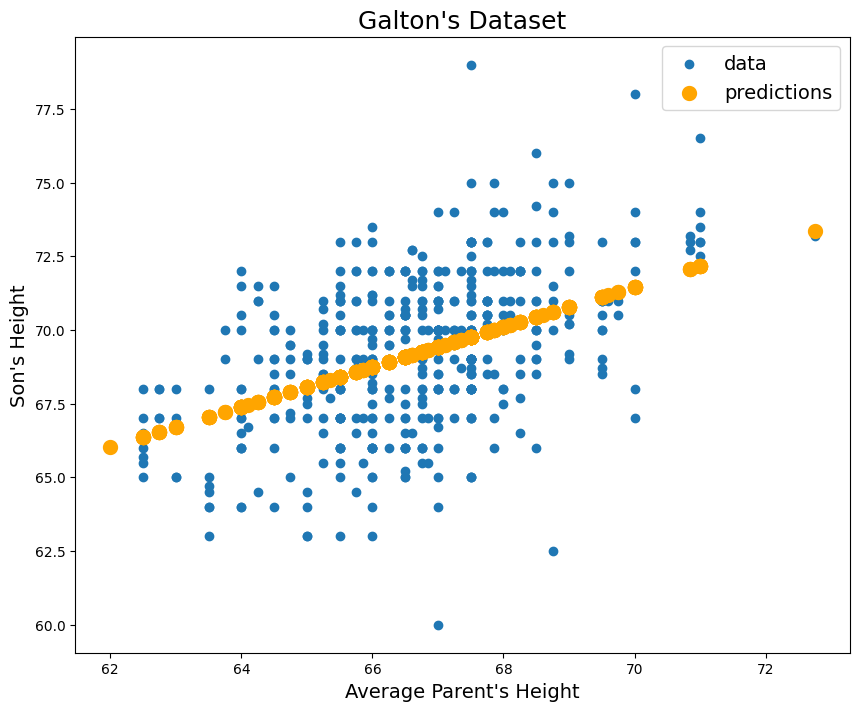

In [ ]:
for i in range(len(trace)):
  #if (i + 1) % 5 == 0:
    y_pred_full = trace[i][0] + trace[i][1]*Xm[:,1]
    clear_output(True)
    plt.figure(figsize=(10,8))
    plt.scatter(X, y, label="data")
    plt.scatter(X, y_pred_full, color="orange", linewidth=5, label="predictions")
    plt.xlabel("Average Parent's Height", fontsize=14)
    plt.ylabel("Son's Height", fontsize=14)
    plt.title("Galton's Dataset", fontsize=18)
    plt.legend(fontsize=14)
    plt.show()


In [ ]:
from matplotlib.animation import FuncAnimation

In [ ]:
#X = scaler.transform(X.reshape(-1,1))[:,0]

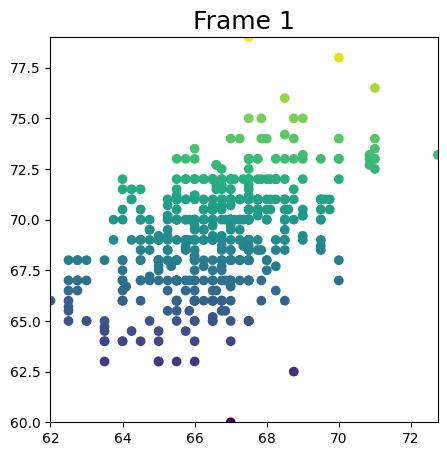

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
x_min = min(X)
x_max = max(X)
y_min = min(y)
y_max = max(y)
x = np.arange(x_min, x_max, 0.1)
x_scalled = scaler.transform(x.reshape(-1,1))[:,0]
def update(frame):
    i = frame
    ax.clear()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.scatter(X, y, c=y)
    #ax.scatter(x, -(w_trace[i][0] + w_trace[i][1] * x) / w_trace[i][2])
    ax.scatter(x, trace[i][0] + trace[i][1]*x_scalled)
    # if i<len(trace)-1:
    #   ax.scatter(point[i][0], point[i][1], c='r')
    ax.set_title(f'Frame {i + 1}', fontsize=18)

ani = FuncAnimation(fig, update, frames=range(len(trace)), repeat=False)

HTML(ani.to_jshtml())

## [Automobiles](https://archive.ics.uci.edu/dataset/10/automobile) Dataset

In [9]:
Data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", \
                    header=None, na_values=["?"])

In [10]:
#pd.set_option('display.max_columns', None)

In [11]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [12]:
Data.isnull().sum()

,0
0,0
1,41
2,0
3,0
4,0
5,2
6,0
7,0
8,0
9,0


Sometimes, absence of the information is a very important information, e.g., missing SSN can indicate that the person is a foreigner. In this case, we create a separate category for nans.

In [13]:
#Data[Data.columns[(Data.dtypes == "object").values]].fillna("")
Data.dropna(subset=Data.columns[Data.columns != 1], inplace=True)

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
Data[1] = imputer.fit_transform(Data[[1]])

In [15]:
y = Data.iloc[:,-1]
X = Data.iloc[:,:-1] #Data.drop(Data.columns[-1], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
               X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [18]:
transform = ColumnTransformer([('OneHot', OneHotEncoder(drop='first', handle_unknown='ignore'),
                                X_train.columns[(X_train.dtypes == "object")].values)], remainder='passthrough')

In [19]:
transform.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 array([ 2,  3,  4,  5,  6,  7,  8, 14, 15, 17]))])

In [20]:
pd.DataFrame(transform.transform(X_train), columns=transform.get_feature_names_out()).head()

,OneHot__x2_audi,OneHot__x2_bmw,OneHot__x2_chevrolet,OneHot__x2_dodge,OneHot__x2_honda,OneHot__x2_jaguar,OneHot__x2_mazda,OneHot__x2_mercedes-benz,OneHot__x2_mitsubishi,OneHot__x2_nissan,...,remainder__x12,remainder__x13,remainder__x16,remainder__x18,remainder__x19,remainder__x20,remainder__x21,remainder__x22,remainder__x23,remainder__x24
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.8,2535.0,122.0,3.34,3.46,8.5,88.0,5000.0,24.0,30.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.1,2758.0,121.0,3.54,3.07,9.3,110.0,5250.0,21.0,28.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,54.5,1951.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,49.7,3071.0,181.0,3.43,3.27,9.0,160.0,5200.0,19.0,25.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0


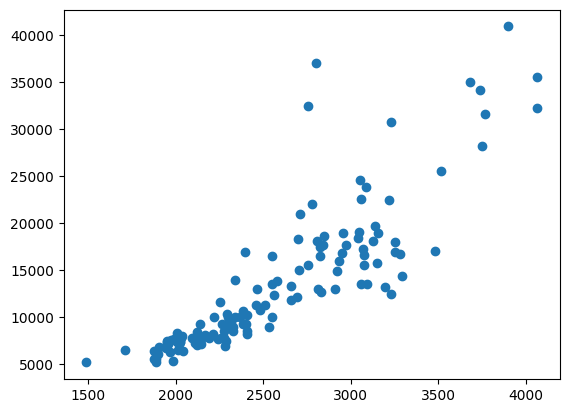

In [42]:
plt.scatter(X_train[13],y_train)  #23 sqrt

In [83]:
y_target=y.values

In [84]:
#Xm=np.vstack((np.ones(len(X)),X[13].values,X[13].values**2,X[13].values**3)).T
Xm=np.vstack((np.ones(len(X)),X[13].values)).T

In [85]:
[w0,w1]=(np.linalg.inv(Xm.T@Xm)@Xm.T).dot(y_target)
w0,w1

(-19578.13476142775, 12.829615832958554)

In [86]:
x = np.linspace(min(X[13]),max(X[13]),100)
y_pred = w0+w1*x

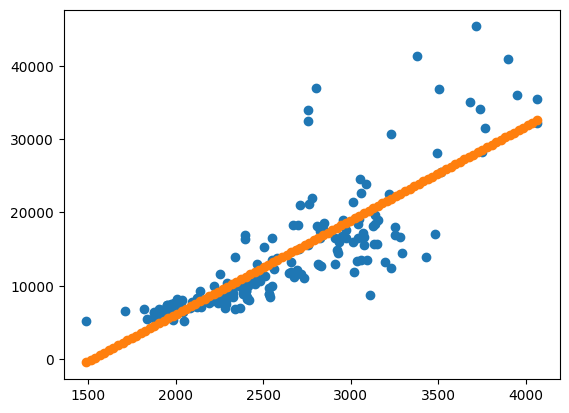

In [87]:
plt.scatter(X[13],y_target)
plt.scatter(x,y_pred)

## Logarithmic scaling of the target

In [88]:
X_train_sc = scaler.fit_transform(X_train[[13]])[:,0]
y_train_sc = np.log1p(y_train)

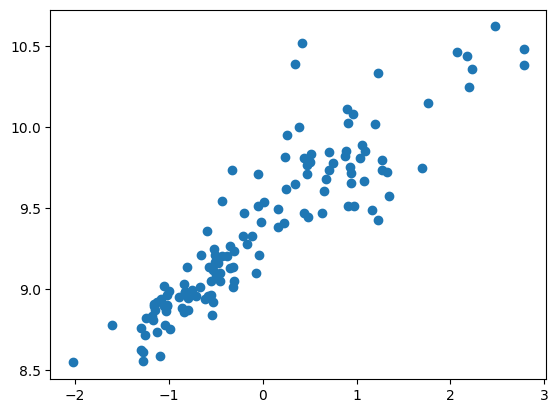

In [89]:
plt.scatter(X_train_sc,y_train_sc)  #23 sqrt

In [90]:
y_target=y_train_sc.values

In [91]:
#Xm=np.vstack((np.ones(len(X)),X[13].values,X[13].values**2,X[13].values**3)).T
Xm=np.vstack((np.ones(len(X_train_sc)),X_train_sc)).T

In [92]:
[w0,w1]=(np.linalg.inv(Xm.T@Xm)@Xm.T).dot(y_target)
w0,w1

(9.378863598762834, 0.44957200004518993)

In [93]:
x = np.linspace(min(X[13]),max(X[13]),100)
x_tr = scaler.transform(x.reshape(-1,1))[:,0]
y_pred = w0+w1*x_tr
y_pred = np.exp(y_pred)-1

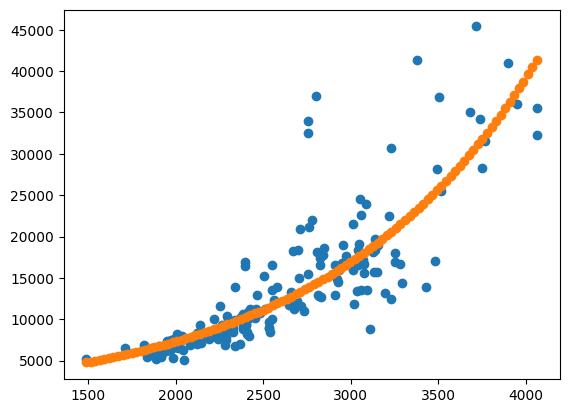

In [94]:
plt.scatter(X[13],y)
plt.scatter(x,y_pred)

## SGD simulation with a buil-in function, tracing the

In [30]:
from sklearn.linear_model import SGDRegressor

In [81]:
train_acc = []
test_acc = []
X_train_t = transform.fit_transform(X_train)
X_test_t = transform.transform(X_test)
reg = SGDRegressor(max_iter=1, warm_start=True,  tol=0,
                       penalty=None,  random_state=42)
for epoc in range(1,1800):
  #reg = SGDRegressor(max_iter=epoc, tol=-np.infty)
  reg.fit(scaler.fit_transform(X_train_t),y_train)
  train_acc.append(mean_squared_error(y_train, reg.predict(scaler.fit_transform(X_train_t))))
  test_acc.append(mean_squared_error(y_test, reg.predict(scaler.fit_transform(X_test_t))))

In [82]:
reg.intercept_, reg.coef_